<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

In [1]:
#import all necessary libaries

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

Below is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [2]:
#Load your csv file

df=pd.read_csv('insurance_data.csv')
df.head()

# 0 stands for not-bought 
# 1 stands for bought

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [3]:
df.shape

(27, 2)

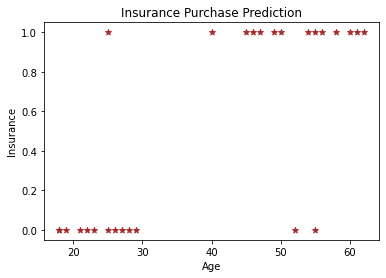

In [4]:
#A scatter plot to show both variables

plt.xlabel('Age')
plt.ylabel('Insurance')
plt.title('Insurance Purchase Prediction')

x=df['age']
y=df['bought_insurance']

plt.scatter(x,y,color='brown', marker='*')
plt.show()

#The plot shows that those below the age of 40 didn't buy the insurance (0) 
#while those above bought insurance (1)


#Logistic regression(Sigmoid) will be the best for this classification problem 
#rather than linear regression. It will give more accuracy

### Training DataSet

In [5]:
# This function splits the dataset into training data and testing data

from sklearn.model_selection import train_test_split

In [6]:
# This function defines age as X and bought_insurance as y
# Stating the test_size as 0.2(20%) means 20% of the dataset will be for testing while 80% is for training the model
# It's the same as stating train_size to be 0.8(80%)

X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.2)#train_size=0.8
X_train

#X_train is the training dataset in X axis i.e the age column
#X_test is the testing dataset in X asis
#y_train is the training dataset in y axis i.e the bought_insurance column
#y_test is the testind dataset in y axis

,age
16,25
5,56
24,50
10,18
13,29
26,23
25,54
22,40
4,46
1,25


In [7]:
# X_test
y_test

#You can call any of your choice or all

8     1
14    1
3     0
20    0
19    0
0     0
Name: bought_insurance, dtype: int64

In [8]:
# This function activates the model we want to use to make our predictions

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [9]:
model.fit(X_train,y_train) #fit method is used to train the dataset

LogisticRegression()

In [10]:
#y_predicted is a variable that holds the predicted value

y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [11]:
y_test

8     1
14    1
3     0
20    0
19    0
0     0
Name: bought_insurance, dtype: int64

In [12]:
model.predict_proba(X_test)
# First column is probability for will not and Second column is for it will

array([[0.02220576, 0.97779424],
       [0.13455664, 0.86544336],
       [0.09069442, 0.90930558],
       [0.90738176, 0.09261824],
       [0.93854386, 0.06145614],
       [0.8941737 , 0.1058263 ]])

In [13]:
#This function measures the accuracy

from sklearn import metrics

In [14]:
metrics.accuracy_score(y_test,y_predicted)

0.8333333333333334

In [15]:
metrics.f1_score(y_test,y_predicted)

0.8

In [16]:
#Input the age you want to predict for

model.predict([[20]])

#this is saying that age 20 will not buy the insurance and from our dataset we agree this is correct

array([0], dtype=int64)

In [17]:
#model.coef_ indicates value of m in y=m*x + b equation

model.coef_

array([[0.14797621]])

In [18]:
#model.intercept_ indicates value of b in y=m*x + b equation

model.intercept_

array([-5.38957756])

In [19]:
#Remember that model is equal to LogisticRegression


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model